In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('student_scores.csv')

In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


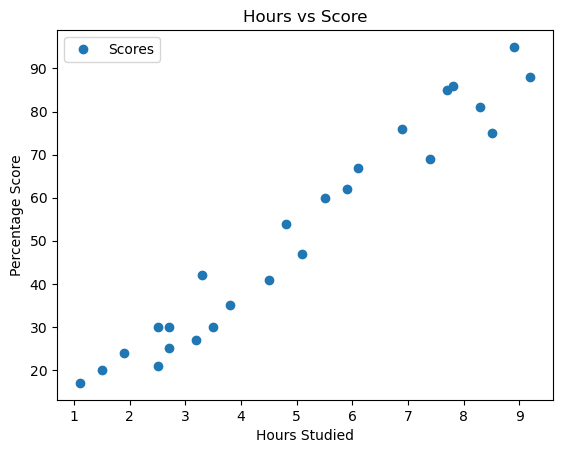

In [6]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [8]:
X.shape

(25, 1)

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [12]:
print(regressor1.intercept_)

2.018160041434683


In [13]:
print(regressor1.coef_)

[9.91065648]


In [14]:
y_pred = regressor1.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


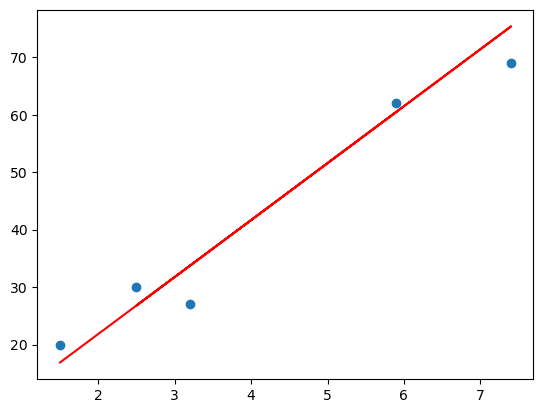

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color= "red")

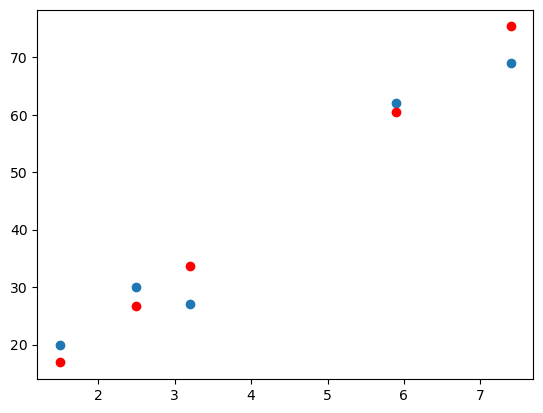

In [17]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color= "red")

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R squared: 0.9454906892105356


In [19]:
import pickle

In [20]:
data = {"model" : regressor1, "hours" : X_train}
with open ('reg_model.pkl', 'wb') as file: # wb - > Write binary # Write to pickle file
    pickle.dump(data,file)

In [21]:
with open('reg_model.pkl','rb') as file: # read the pickle file # rb ->read binary
    data = pickle.load(file)
    
regressor_loaded = data["model"]
hours = data["hours"]

In [22]:
y_pred = regressor_loaded.predict(X_test[[0]])
print(f"Number of hours : {X_test[0]}, Marks: {y_pred}")


Number of hours : [1.5], Marks: [16.88414476]
